In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import lzma,json

In [3]:
f=lzma.open("ep/ep_meps_current.json.xz")
#http://parltrack.euwiki.org/dumps/ep_meps_current.json.xz
members=json.loads(f.read())

In [4]:
f=lzma.open("ep/ep_votes.json.xz")
#http://parltrack.euwiki.org/dumps/ep_votes.json.xz
votes=json.loads(f.read())

In [5]:
countries=['Hungary','Romania']
eu={}
parties={}
groups={}
names={}
for j in members:
    z='Constituencies'
    w='Groups'    
    if z in j:
        if j[z][0]['country'] in countries:
            if j[z][0]['country'] not in eu:eu[j[z][0]['country']]={}
            eu[j[z][0]['country']][j['UserID']]=j
            names[j['Name']['full']]=j
            for i in j[z]:
                if type(i['party'])==str:
                    party=i['party']
                else:
                    party=i['party'][0]
                party=str(party)
                start=int(str(i['start'])[:4])
                end=int(str(i['end'])[:4])
                if end==9999:
                    end=2019
                if party not in parties:
                    parties[party]={'min':9999,'max':0}
                parties[party]['min']=min(start,parties[party]['min'])
                parties[party]['max']=max(end,parties[party]['max'])
            if w in j:
                for i in j[w]:
                    party=i['Organization']
                    party=str(party)
                    if type(i['groupid'])==str:
                        code=i['groupid']
                    else:
                        code=i['groupid'][0]
                    start=int(str(i['start'])[:4])
                    end=int(str(i['end'])[:4])
                    if end==9999:
                        end=2019
                    if party not in groups:
                        groups[party]={'min':9999,'max':0}
                    groups[party]['min']=min(start,groups[party]['min'])
                    groups[party]['max']=max(end,groups[party]['max'])
                    groups[party]['code']=code

In [6]:
groups

{"Group of the European People's Party (Christian Democrats)": {'min': 2009,
  'max': 2019,
  'code': 'PPE'},
 'Non-attached Members': {'min': 2005, 'max': 2019, 'code': 'NA'},
 "Group of the European People's Party (Christian Democrats) and European Democrats": {'min': 2003,
  'max': 2009,
  'code': 'PPE-DE'},
 'Group of the Alliance of Liberals and Democrats for Europe': {'min': 2004,
  'max': 2019,
  'code': 'ALDE'},
 'European Conservatives and Reformists Group': {'min': 2009,
  'max': 2019,
  'code': 'ECR'},
 'Group of the Progressive Alliance of Socialists and Democrats in the European Parliament': {'min': 2009,
  'max': 2019,
  'code': 'S&D'},
 'Socialist Group in the European Parliament': {'min': 2004,
  'max': 2009,
  'code': 'PSE'},
 'Group of the Party of European Socialists': {'min': 2003,
  'max': 2004,
  'code': 'PSE'},
 'Identity, Tradition and Sovereignty Group': {'min': 2007,
  'max': 2007,
  'code': 'ITS'},
 'Group of the European Liberal, Democrat and Reform Party': 

In [7]:
parties

{'Fidesz-Magyar Polgári Szövetség-Keresztény Demokrata Néppárt': {'min': 2009,
  'max': 2014},
 'Partidul Democrat-Liberal': {'min': 2008, 'max': 2015},
 'Partidul România Mare': {'min': 2007, 'max': 2014},
 'Partidul Democrat': {'min': 2007, 'max': 2008},
 'Fidesz-Magyar Polgári Szövetség': {'min': 2004, 'max': 2009},
 'Partidul Naţional Liberal': {'min': 2007, 'max': 2019},
 'Partidul Naţional Ţaranesc Creştin Democrat': {'min': 2014, 'max': 2014},
 'Modern Magyarország Mozgalom': {'min': 2013, 'max': 2014},
 'Magyar Demokrata Fórum': {'min': 2004, 'max': 2013},
 'Magyar Szocialista Párt': {'min': 2004, 'max': 2019},
 'Szabad Demokraták Szövetsége': {'min': 2004, 'max': 2009},
 'Partidul Social Democrat': {'min': 2007, 'max': 2019},
 'Jobbik Magyarországért Mozgalom': {'min': 2009, 'max': 2019},
 'Partidul Liberal Democrat': {'min': 2007, 'max': 2008},
 'Uniunea Democrată Maghiară din România': {'min': 2007, 'max': 2019},
 'Partidul Conservator': {'min': 2007, 'max': 2015},
 '-': {'m

In [8]:
open('ep/export/json/names.json','w').write(json.dumps(names))
open('ep/export/json/groups.json','w').write(json.dumps(groups))
open('ep/export/json/parties.json','w').write(json.dumps(parties))

2084

In [9]:
def party_normalizer(party):
    if party in ['ALDE','ELDR']: return 'ALDE'
    elif party in ['ITS','ENF']: return 'ENF'
    elif party in ['NA','NI',['NA', 'NI'],'-','Independent']: return 'N/A'
    elif party in ['PPE','PPE-DE']: return  'EPP'
    elif party in ['Verts/ALE']: return  'Greens'
    elif party in ['S&D','PSE']: return 'S&D'
    elif party in ['ALDE Romania','Partidul Conservator','Partidul Puterii Umaniste']: return 'ALDE RO'
    elif party in ['Demokratikus Koalíció']: return 'DK'
    elif party in ['Együtt 2014 - Párbeszéd Magyarországért']:return 'Együtt PM'
    elif party in ['Fidesz-Magyar Polgári Szövetség',
        'Fidesz-Magyar Polgári Szövetség-Keresztény Demokrata Néppárt',
        'Fidesz-Magyar Polgári Szövetség-Kereszténydemokrata Néppárt',
        'Kereszténydemokrata Néppárt']:return 'FIDESZ-KDNP'
    elif party in ['Forumul Democrat al Germanitor din România']: return 'FDGR'
    elif party in ['Jobbik Magyarországért Mozgalom']:return 'Jobbik'
    elif party in ['Lehet Más A Politika']:return 'LMP'
    elif party in ['Magyar Demokrata Fórum','Modern Magyarország Mozgalom',
                'Szabad Demokraták Szövetsége']: return 'Egyéb'
    elif party in ['Magyar Szocialista Párt']: return 'MSZP'
    elif party in ['Partidul Democrat','Partidul Democrat-Liberal','Partidul Naţional Liberal',
        'Partidul Liberal Democrat','PNL']: return'PNL'
    elif party in ['Partidul Mișcarea Populară']: return 'PMP'
    elif party in ['Partidul Naţional Ţaranesc Creştin Democrat']:return 'PNȚCD'
    elif party in ['Partidul România Mare']:return 'PRM'
    elif party in ['Partidul Social Democrat','Partidul Social Democrat + Partidul Conservator']:return 'PSD'
    elif party in ['Romániai Magyar Demokrata Szövetség',
        'Uniunea Democrată Maghiară din România']:return 'RMDSZ'
    elif party in ['Uniunea Națională pentru Progresul României']: return 'UNPR'
    else: return party

In [10]:
def party_normalizer2(party):
    if party in ['ALDE','ELDR']: return 'ALDE ⏩'
    elif party in ['ITS','ENF']: return 'ENF 🌐'
    elif party in ['NA','NI',['NA', 'NI'],'-','Independent']: return 'N/A 👤'
    elif party in ['PPE','PPE-DE']: return  'EPP ⭐️'
    elif party in ['Verts/ALE']: return  'Greens 🌻'
    elif party in ['S&D','PSE']: return 'S&D 🔴'
    elif party in ['ECR']: return 'ECR 🦁'
    elif party in ['ALDE Romania','Partidul Conservator','Partidul Puterii Umaniste']: return 'ALDE RO 🕊️'
    elif party in ['Demokratikus Koalíció']: return 'DK 🔵'
    elif party in ['Együtt 2014 - Párbeszéd Magyarországért']:return 'Együtt PM ✳️'
    elif party in ['Fidesz-Magyar Polgári Szövetség',
        'Fidesz-Magyar Polgári Szövetség-Keresztény Demokrata Néppárt',
        'Fidesz-Magyar Polgári Szövetség-Kereszténydemokrata Néppárt',
        'Kereszténydemokrata Néppárt']:return 'FIDESZ-KDNP 🍊'
    elif party in ['Forumul Democrat al Germanitor din România']: return 'FDGR ⚫️'
    elif party in ['Jobbik Magyarországért Mozgalom']:return 'Jobbik ✅'
    elif party in ['Lehet Más A Politika']:return 'LMP 🏃‍♂️'
    elif party in ['Magyar Demokrata Fórum','Modern Magyarország Mozgalom',
                'Szabad Demokraták Szövetsége']: return 'Egyéb ⭕️'
    elif party in ['Magyar Szocialista Párt']: return 'MSZP 🌸'
    elif party in ['Partidul Democrat','Partidul Democrat-Liberal','Partidul Naţional Liberal',
        'Partidul Liberal Democrat','PNL']: return'PNL 🔶'
    elif party in ['Partidul Mișcarea Populară']: return 'PMP 🍏'
    elif party in ['Partidul Naţional Ţaranesc Creştin Democrat']:return 'PNȚCD ✳️'
    elif party in ['Partidul România Mare']:return 'PRM 🔱'
    elif party in ['Partidul Social Democrat','Partidul Social Democrat + Partidul Conservator']:return 'PSD 🌹'
    elif party in ['Romániai Magyar Demokrata Szövetség',
        'Uniunea Democrată Maghiară din România']:return 'RMDSZ 🌷'
    elif party in ['Uniunea Națională pentru Progresul României']: return 'UNPR 🦅'
    else: return party

In [11]:
party_image_links={
"ALDE":"alde.jpg",
"ECR":"ecr.jpg",
"ENF":"enf.jpg",
"N/A":"independent.png",
"EPP":"epp.jpg",
"S&D":"S&D.png",
"Greens":"greens.png",
"ALDE RO":"aldero.jpg",
"DK":"dk.png",
"Egyéb":"hun.jpg",
"Együtt PM":"egyutt.jpg",
"FDGR":"fdgr.jpg",
"FIDESZ-KDNP":"fidesz.png",
"Jobbik":"jobbik.png",
"LMP":"lmp.jpg",
"MSZP":"mszp.png",
"PMP":"pmp.png",
"PNL":"pnl.png",
"PNȚCD":"pntcd.png",
"PRM":"prm.png",
"PSD":"psd.png",
"RMDSZ":"rmdsz.jpg",
"UNPR":"unpr.jpg"
}
master_image_path='https://szekelydata.csaladen.es/ep/ep/img/'

In [12]:
def get_photo(name,allegiance_type2):
    if allegiance_type2=='name':
        return names[name]['Photo']
    else:
        if name in party_image_links:
            return master_image_path+party_image_links[name]
        else:
            return ''

In [13]:
def get_photos(df,allegiance_type2):
    photos=[]
    for i in df['name2'].values:
        photos.append(get_photo(i,allegiance_type2))
    df['image']=photos
    df=df[list(df.columns[:2])+list([df.columns[-1]])+list(df.columns[2:-1])]
    return df

In [14]:
from colorthief import ColorThief

In [15]:
plt.style.use('fivethirtyeight')
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [16]:
def party_color(party,default_color="#000000"):
    if party in party_image_links:
        path='ep/img/'+party_image_links[party]
        color_thief = ColorThief(path)
        rgb_color=color_thief.get_color(quality=1)        
        return '#%02x%02x%02x' % rgb_color
    else:
        return default_color

In [17]:
party_color_links={}
for party in party_image_links:
    party_color_links[party]=party_color(party)

In [18]:
def get_link_color(party,default_color="#000000"):
    if party=='N/A': return '#444444'
    elif party=='ENF': return '#777777'
    elif party=='ALDE RO': return '#459ccc'
    elif party=='FDGR': return '#961934'
    elif party=='Jobbik': return '#3cb25a'
    elif party in party_color_links:
        return party_color_links[party]
    else:
        return default_color

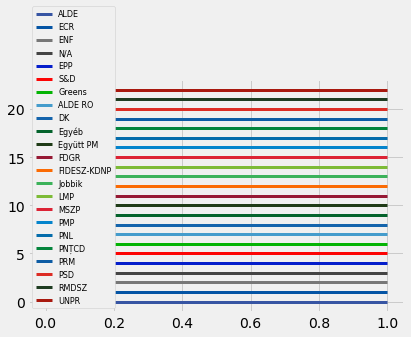

In [19]:
for e,i in enumerate(party_color_links):
    plt.plot([0,1],[e,e],color=get_link_color(i),lw=3,label=i)
    plt.legend(fontsize=8,loc=3,framealpha=1)

In [20]:
for e,i in enumerate(party_color_links):
    print(i+':',get_link_color(i))

ALDE: #3755a3
ECR: #0454a4
ENF: #777777
N/A: #444444
EPP: #051ecb
S&D: #fc0404
Greens: #04b404
ALDE RO: #459ccc
DK: #1464ac
Egyéb: #04632c
Együtt PM: #1f3b17
FDGR: #961934
FIDESZ-KDNP: #fb6b04
Jobbik: #3cb25a
LMP: #7dbb37
MSZP: #dc2335
PMP: #0484cc
PNL: #046cab
PNȚCD: #04843c
PRM: #0d5ca4
PSD: #dc2c24
RMDSZ: #1e3c21
UNPR: #a8190f


In [21]:
pnames=[]
for name in names:
    dummy={'name':name}
    dummy['party']=party_normalizer(names[name]['Constituencies'][0]['party'])
    dummy['group']=party_normalizer(names[name]['Groups'][0]['groupid'])
    dummy['party2']=party_normalizer2(names[name]['Constituencies'][0]['party'])
    dummy['group2']=party_normalizer2(names[name]['Groups'][0]['groupid'])
    dummy['partycolor']=get_link_color(dummy['party'])
    dummy['groupcolor']=get_link_color(dummy['group'])
    dummy['image']=get_photo(name,'name')
    pnames.append(dummy)
open('ep/export/json/pnames.json','w').write(json.dumps(pnames))

39903

In [22]:
def get_allegiance(allegiance,voteid,outcome,name):
    if voteid not in allegiance:
        allegiance[voteid]={'title':j['title'],'url':j['url'],'ts':j['ts']}
    if outcome not in allegiance[voteid]:
        allegiance[voteid][outcome]=[]
    allegiance[voteid][outcome].append(name)
    return allegiance

In [23]:
eu_allegiance={}
eu_vt={}
eu_joint_allegiance={}
eu_joint_vt={}
for country in countries:
    hu=eu[country]
    hu_allegiance={}
    hu_vt={}
    for j in votes:
        ts=j['ts']
        year=str(ts)[:4]
        if year not in hu_vt:hu_vt[year]=[]
        if year not in hu_allegiance:hu_allegiance[year]={'name':{},'group':{},'party':{}}  
        if year not in eu_joint_vt:eu_joint_vt[year]=[]
        if year not in eu_joint_allegiance:eu_joint_allegiance[year]={'name':{},'group':{},'party':{}}    
        if j['title'] not in ["Modification de l'ordre du jour"]:
            for outcome in ['For','Against']:
                if outcome in j:
                    for group in j[outcome]['groups']:
                        for i in group['votes']:
                            if i['ep_id'] in hu:
                                dummy={}
                                dummy['vote']=j['voteid']
                                dummy['party']='-'
                                for k in hu[i['ep_id']]['Constituencies']:
                                    if k['start']<ts<k['end']:
                                        dummy['party']=k['party']
                                dummy['name']=hu[i['ep_id']]['Name']['full']
                                dummy['outcome']=outcome
                                dummy['group']=group['group']
                                dummy['party']=party_normalizer(dummy['party'])
                                dummy['group']=party_normalizer(dummy['group'])
                                dummy['title']=j['title']
                                dummy['url']=j['url']
                                dummy['ts']=ts
                                dummy['year']=year
                                hu_vt[year].append(dummy)
                                eu_joint_vt[year].append(dummy)
                                for allegiance_type in ['name','group','party']:
                                    hu_allegiance[year][allegiance_type]=\
                                        get_allegiance(hu_allegiance[year][allegiance_type],j['voteid'],
                                                   outcome,dummy[allegiance_type])
                                    eu_joint_allegiance[year][allegiance_type]=\
                                        get_allegiance(eu_joint_allegiance[year][allegiance_type],j['voteid'],
                                                   outcome,dummy[allegiance_type])
    eu_allegiance[country]=hu_allegiance
    eu_vt[country]=hu_vt
    print(country)

Hungary
Romania


Joint allegiance

In [24]:
eu_allegiance['Joint']=eu_joint_allegiance
eu_vt['Joint']=eu_joint_vt
countries=countries+['Joint']

Allegiance

In [25]:
def get_allegiance_matrix(key,vt,allegiance):
    allegiance_matrix={}
    initvote={'Same':0,'Opposite':0,'Total':0}
    for j1 in vt:
        outcome=j1['outcome']
        name1=j1[key]
        if name1 not in allegiance_matrix:allegiance_matrix[name1]={}
        if outcome=='For':
            for name2 in allegiance[j1['vote']]['For']:
                if name2 not in allegiance_matrix[name1]:
                    allegiance_matrix[name1][name2]=dict(initvote)
                allegiance_matrix[name1][name2]['Total']+=1
                allegiance_matrix[name1][name2]['Same']+=1
            if 'Against' in allegiance[j1['vote']]:
                for name2 in allegiance[j1['vote']]['Against']:
                    if name2 not in allegiance_matrix[name1]:
                        allegiance_matrix[name1][name2]=dict(initvote)
                    allegiance_matrix[name1][name2]['Total']+=1
                    allegiance_matrix[name1][name2]['Opposite']+=1
        elif outcome=='Against':
            for name2 in allegiance[j1['vote']]['Against']:
                if name2 not in allegiance_matrix[name1]:
                    allegiance_matrix[name1][name2]=dict(initvote)
                allegiance_matrix[name1][name2]['Total']+=1
                allegiance_matrix[name1][name2]['Same']+=1
            if 'For' in allegiance[j1['vote']]:
                for name2 in allegiance[j1['vote']]['For']:
                    if name2 not in allegiance_matrix[name1]:
                        allegiance_matrix[name1][name2]=dict(initvote)
                    allegiance_matrix[name1][name2]['Total']+=1
                    allegiance_matrix[name1][name2]['Opposite']+=1
    for j in allegiance_matrix:
        for i in allegiance_matrix[j]:
            allegiance_matrix[j][i]['Same_perc']=np.round(allegiance_matrix[j][i]['Same']/allegiance_matrix[j][i]['Total'],3)
            allegiance_matrix[j][i]['Opposite_perc']=np.round(allegiance_matrix[j][i]['Opposite']/allegiance_matrix[j][i]['Total'],3)
    return allegiance_matrix

In [26]:
eu_allegiance_matrix={}
for country in countries:
    for year in sorted(eu_vt[country]):
        for allegiance_type1 in ['name','group','party']:
            for allegiance_type2 in ['name','group','party']:
                dummy=get_allegiance_matrix(allegiance_type1,eu_vt[country][year],
                        eu_allegiance[country][year][allegiance_type2])
                if dummy!={}:
                    if country not in eu_allegiance_matrix:eu_allegiance_matrix[country]={}
                    if year not in eu_allegiance_matrix[country]:eu_allegiance_matrix[country][year]={}
                    if allegiance_type1 not in eu_allegiance_matrix[country][year]:
                        eu_allegiance_matrix[country][year][allegiance_type1]={}
                    if allegiance_type2 not in eu_allegiance_matrix[country][year][allegiance_type1]:
                        eu_allegiance_matrix[country][year][allegiance_type1][allegiance_type2]={}
                    eu_allegiance_matrix[country][year][allegiance_type1][allegiance_type2]=dummy
        print(country,year)

Hungary 2004
Hungary 2005
Hungary 2006
Hungary 2007
Hungary 2008
Hungary 2009
Hungary 2010
Hungary 2011
Hungary 2012
Hungary 2013
Hungary 2014
Hungary 2015
Hungary 2016
Hungary 2017
Hungary 2018
Hungary 2019
Romania 2004
Romania 2005
Romania 2006
Romania 2007
Romania 2008
Romania 2009
Romania 2010
Romania 2011
Romania 2012
Romania 2013
Romania 2014
Romania 2015
Romania 2016
Romania 2017
Romania 2018
Romania 2019
Joint 2004
Joint 2005
Joint 2006
Joint 2007
Joint 2008
Joint 2009
Joint 2010
Joint 2011
Joint 2012
Joint 2013
Joint 2014
Joint 2015
Joint 2016
Joint 2017
Joint 2018
Joint 2019


In [27]:
open('ep/export/json/eu_allegiance_matrix.json','w').write(json.dumps(eu_allegiance_matrix))

13362078

Listify dictionary

In [28]:
eu_allegiance_list=[]
for country in sorted(eu_allegiance_matrix):
    for year in sorted(eu_allegiance_matrix[country]):
        for allegiance_type1 in sorted(eu_allegiance_matrix[country][year]):
            for allegiance_type2 in sorted(eu_allegiance_matrix[country][year][allegiance_type1]):
                for name1 in sorted(eu_allegiance_matrix[country][year][allegiance_type1][allegiance_type2]):
                    for name2 in sorted(eu_allegiance_matrix[country][year][allegiance_type1][allegiance_type2][name1]):
                        dummy={'country':country,
                                'year':year,
                                'allegiance_type1':allegiance_type1,
                                'allegiance_type2':allegiance_type2,
                                'name1':name1,
                                'name2':name2}
                        for key in sorted(eu_allegiance_matrix[country][year][allegiance_type1][allegiance_type2][name1][name2]):
                            dummy[key]=eu_allegiance_matrix[country][year]\
                                [allegiance_type1][allegiance_type2][name1][name2][key]
                        if name1!=name2:
                            eu_allegiance_list.append(dummy)

In [29]:
open('ep/export/json/eu_allegiance_list.json','w').write(json.dumps(eu_allegiance_list))

28437990

For Flourish

In [30]:
eu_allegiance_list=[]
for country in sorted(eu_allegiance_matrix):
    for year in sorted(eu_allegiance_matrix[country]):
        for allegiance_type1 in sorted(eu_allegiance_matrix[country][year]):
            for allegiance_type2 in sorted(eu_allegiance_matrix[country][year][allegiance_type1]):
                for name1 in sorted(eu_allegiance_matrix[country][year][allegiance_type1][allegiance_type2]):
                    for name2 in sorted(eu_allegiance_matrix[country][year][allegiance_type1][allegiance_type2][name1]):
                        dummy={'country':country,
                                'year':year,
                                'allegiance_type1':allegiance_type1,
                                'allegiance_type2':allegiance_type2,
                                'name1':name1,
                                'name2':name2}
                        for key in sorted(eu_allegiance_matrix[country][year][allegiance_type1][allegiance_type2][name1][name2]):
                            dummy[key]=eu_allegiance_matrix[country][year]\
                                [allegiance_type1][allegiance_type2][name1][name2][key]
                        if name1!=name2:
                            eu_allegiance_list.append(dummy)

In [31]:
for country in sorted(eu_allegiance_matrix):
    for allegiance_type1 in sorted(eu_allegiance_matrix[country][year]):
        for allegiance_type2 in sorted(eu_allegiance_matrix[country][year][allegiance_type1]):
            print(country,allegiance_type1,allegiance_type2)
            df=pd.DataFrame(eu_allegiance_list).set_index('allegiance_type1').loc[allegiance_type1]\
                .set_index('allegiance_type2').loc[allegiance_type2].set_index('country').loc[country]\
                .set_index(['name1','name2','year'])[['Same_perc']].unstack()
            df=df['Same_perc'].reset_index()
            df=get_photos(df,allegiance_type2)
            df.to_excel('ep/export/flourish/'+country+'_'+allegiance_type1+'_'+allegiance_type2+'.xlsx')

Hungary group group
Hungary group name
Hungary group party
Hungary name group
Hungary name name
Hungary name party
Hungary party group
Hungary party name
Hungary party party
Joint group group
Joint group name
Joint group party
Joint name group
Joint name name
Joint name party
Joint party group
Joint party name
Joint party party
Romania group group
Romania group name
Romania group party
Romania name group
Romania name name
Romania name party
Romania party group
Romania party name
Romania party party


Clusterings

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [33]:
def dict_2_matrix(matrix,key,party_labels=False):
    labels=sorted(matrix)
    slabels=[]
    for i in range(len(labels)):
        label=labels[i]
        if label in names:
            if party_labels:
                party=party_normalizer(names[label]['Constituencies'][0]['party'])
                group=party_normalizer(names[label]['Groups'][0]['groupid'])
                slabels.append(str(label)+u' | '+str(party)+' | '+str(group))
            else:
                slabels.append(label)
        else:
            slabels.append(label)

    #extend to square matrix
    inner_keys=matrix[sorted(matrix)[0]]
    inner_keys=sorted(inner_keys[sorted(inner_keys)[0]])
    for name1 in  labels:
        for name2 in labels:
            if name2 not in matrix[name1]:
                matrix[name1][name2]={i:0 for i in inner_keys}
    return np.array([[matrix[name1][name2][key] for name2 in sorted(matrix[name1])] for name1 in labels]),slabels

In [34]:
def hier_cluster(matrix,level,th=1,key='Same_perc',party_labels=False,method='single', metric='euclidean',criterion='distance'):
    X,labelList=dict_2_matrix(matrix[level][level],key,party_labels)
    linked = linkage(X, method=method,metric=metric)
    f=fcluster(linked, th, criterion)
    labelList=[labelList[i]+' | '+str(f[i]) for i in range(len(labelList))]
    return linked,labelList

In [35]:
def dendro(matrix,level,th=1,key='Same_perc',party_labels=False,method='single', metric='euclidean'):
    linked,labelList=hier_cluster(matrix,level,th,key,party_labels,method, metric)
    plt.figure(figsize=(7, len(labelList)//4+1))
    dendrogram(linked,  
                orientation='right',
                labels=labelList,
                p=4,
                #truncate_mode='lastp',
                #show_contracted=True,
                color_threshold=th,
                distance_sort='descending',
                show_leaf_counts=True)
    ax=plt.gca()
    ax.grid(False)
    ax.set_xticks([])
    ax.set_xticklabels([])
    plt.setp(ax.get_yticklabels(), fontsize=10)
    ylbls = ax.get_ymajorticklabels()
    num=-1
    for lbl in ylbls:
        l=lbl.get_text()
        l=l[l.find('|')+2:]
        l=l[:l.find('|')-1]
        num+=1
        lbl.set_color(get_link_color(l))
    plt.show()  

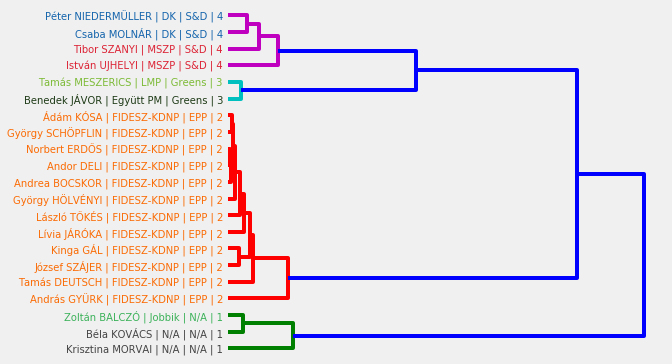

In [36]:
dendro(eu_allegiance_matrix['Hungary']['2018'],'name',2,'Same_perc',True,'complete','seuclidean')

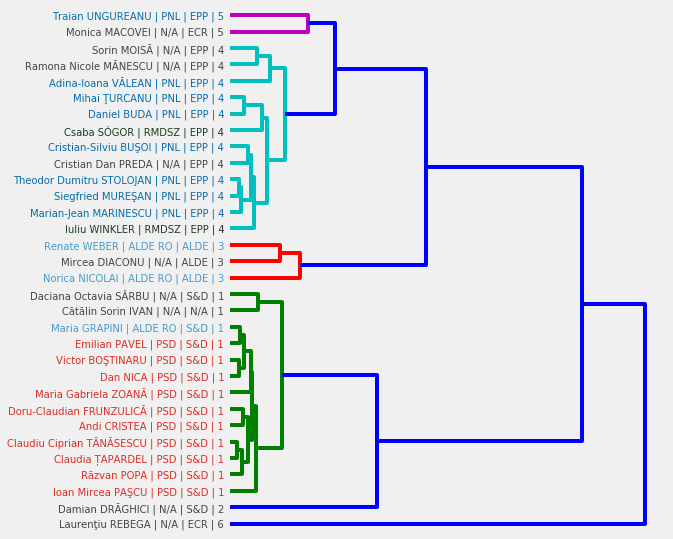

In [37]:
dendro(eu_allegiance_matrix['Romania']['2018'],'name',3,'Same_perc',True,'complete','seuclidean')

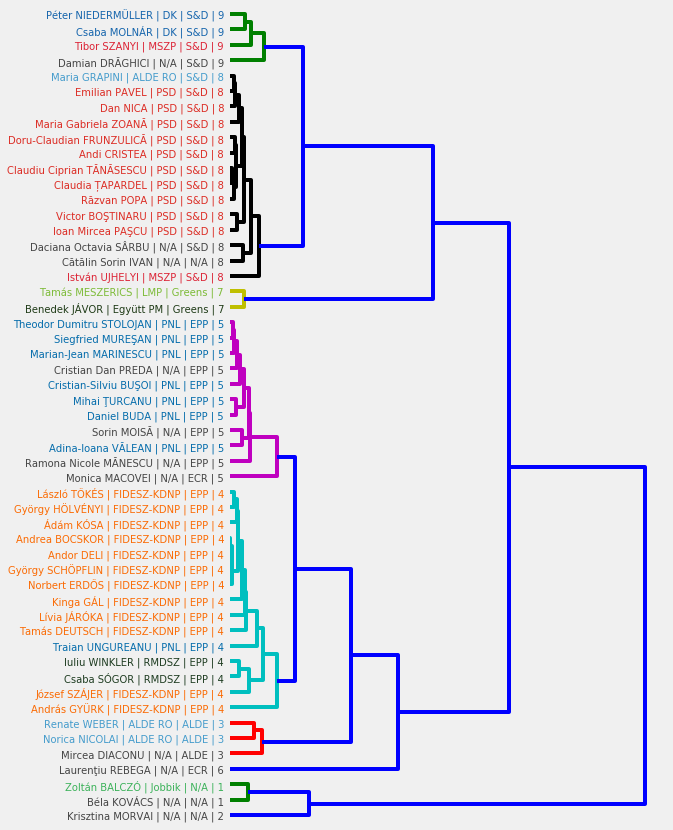

In [38]:
dendro(eu_allegiance_matrix['Joint']['2018'],'name',4,'Same_perc',True,'complete','seuclidean')

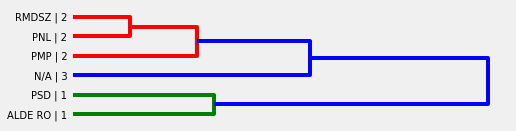

In [39]:
dendro(eu_allegiance_matrix['Romania']['2018'],'party',2,'Same_perc',True,'complete','seuclidean')

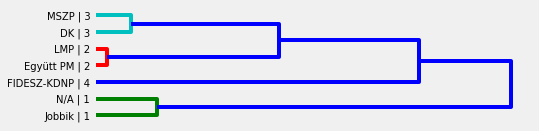

In [40]:
dendro(eu_allegiance_matrix['Hungary']['2018'],'party',2,'Same_perc',True,'complete','seuclidean')

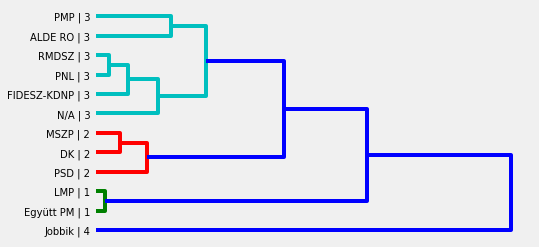

In [41]:
dendro(eu_allegiance_matrix['Joint']['2018'],'party',4,'Same_perc',True,'complete','seuclidean')

Exctract clusters

In [42]:
def get_unique_parent_node(nodes_children,node):
    if node in leafs:
        return node
    elif len(nodes_children[node])>1:
        return node
    else:
        return get_unique_parent_node(nodes_children,nodes_children[node][0])
def get_unique_parent(node,node_dict,unique_node_set,root):
    if node not in node_dict: 
        return root
    elif node_dict[node] in unique_node_set:
        return node_dict[node]
    else:
        return get_unique_parent(node_dict[node],node_dict,unique_node_set,root)

In [43]:
master_tree={}
nc_levels=10
key='Same_perc'
mpruned_nodes=[]
for country in countries:
    for year in eu_allegiance_matrix[country]:
        for allegiance in eu_allegiance_matrix[country][year]:
            uid=country+year+allegiance
            cluster_list=[]
            clusterdummy={}
            for nc in range(2,nc_levels):
                hc,hlabels=hier_cluster(eu_allegiance_matrix[country][year],
                                        allegiance,nc,key,True,'complete','seuclidean','maxclust')
                for i in hlabels:
                    hi=i.split('|')
                    name=hi[0].strip()
                    cluster_no=hi[-1].strip()
                    if name not in clusterdummy:
                        clusterdummy[name]={}
                        clusterdummy[name]['name']=name
                        clusterdummy[name]['cluster_level_'+str(nc_levels)]=name
                        clusterdummy[name]['country']=country
                        clusterdummy[name]['cluster_level_1']=country
                    clusterdummy[name]['cluster_level_'+str(nc)]='c'+str(nc)+str(cluster_no)
            cluster_list=list(clusterdummy.values())
            #construct tree
            leafs=sorted(clusterdummy)
            nodes=[{'name':country}]
            nodes_done=set()
            nodes_children={}
            for i in cluster_list:
                for cluster_level in range(2,nc_levels+1):
                    node=i['cluster_level_'+str(cluster_level)]
                    parent=i['cluster_level_'+str(cluster_level-1)]
                    if node not in nodes_done:
                        dummy={}
                        nodes_done.add(node)
                        dummy['name']=node
                        dummy['parent']=parent
                        if parent not in nodes_children:nodes_children[parent]=[]
                        nodes_children[parent].append(node)
                        nodes.append(dummy)
            #get unique nodes
            node_dict={i['name']:i['parent'] for i in nodes[1:]}
            unique_nodes={}
            for node in nodes_children:
                unique_nodes[node]=get_unique_parent_node(nodes_children,node)
            unique_node_set=set(unique_nodes.values()).union(set(leafs))
            #prune
            pruned_nodes=[]
            for i in nodes:
                dummy=i
                name=i['name']
                if 'parent' not in i:
                    pruned_nodes.append(i)
                elif i['name'] in unique_node_set:
                    dummy['parent']=get_unique_parent(name,node_dict,unique_node_set,nodes[0]['name'])
                    if name in leafs:
                        if allegiance=='name':
                            dummy['party']=party_normalizer(names[name]['Constituencies'][0]['party'])
                            dummy['group']=party_normalizer(names[name]['Groups'][0]['groupid'])
                            dummy['party2']=party_normalizer2(names[name]['Constituencies'][0]['party'])
                            dummy['group2']=party_normalizer2(names[name]['Groups'][0]['groupid'])
                        else:
                            dummy['party']=''
                            dummy['group']=''
                            dummy['party2']=''
                            dummy['group2']=''
                        dummy['image']=get_photo(name,allegiance)     
                    pruned_nodes.append(dummy)
            for i in pruned_nodes:
                dummy=i
                if 'party' in dummy:
                    dummy['partycolor']=get_link_color(dummy['party'])
                if 'group' in dummy:
                    dummy['groupcolor']=get_link_color(dummy['group'])
                dummy['country']=country
                dummy['year']=year
                dummy['allegiance']=allegiance
                mpruned_nodes.append(dummy)
open('ep/export/json/nodes.json','w').write(json.dumps(mpruned_nodes))

767804